<a href="https://colab.research.google.com/github/sammed97/Credit_Card_Default_Prediction/blob/main/Credit_Card_Default_Prediction_Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **1. Importing the Data**

**Importing all required libraries**

In [ ]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



**Mounting the google drive**

In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**We will now load the dataset**

In [ ]:
# Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/M4/default of credit card clients.csv')

# **2. Understanding the Data**

## **EDA - Exporatory Data Analysis**

**We will explore first and last 5 rows for better undestanding of dataset**

In [ ]:
# It will get the first 5 observations of dataset
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# It will get last 5 rows of the dataset
df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


**Exploring the column/Feature Names**

In [ ]:
# It will give us the column names
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

### **Description of columns from dataset documentation**

There are 25 variables:

• **ID:** ID of each client

• **LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit

• **SEX:** Gender (1=male, 2=female)

• **EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

• **MARRIAGE:** Marital status (1=married, 2=single, 3=others)

• **AGE:** Age in years

• **PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

• **PAY_2:** Repayment status in August, 2005 (scale same as above)

• **PAY_3:** Repayment status in July, 2005 (scale same as above)

• **PAY_4:** Repayment status in June, 2005 (scale same as above)

• **PAY_5:** Repayment status in May, 2005 (scale same as above)

• **PAY_6:** Repayment status in April, 2005 (scale same as above)

• **BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)

• **BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)

• **BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)

• **BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)

• **BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)

• **BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)

• **PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)

• **PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)

• **PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)

• **PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)

• **PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)

• **PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)

**Target Variable**

• **default.payment.next.month**: Default payment (1=yes, 0=no)

In [ ]:
# Now we will check the shape of column, means total number of rows and columns
df.shape

(30001, 25)

**We will set the first row as our new header so that we can easily understand the features.**

In [ ]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [ ]:
# Checking the new header
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Again checking the features names after changing the header
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

**We will rename some features for our better understanding**

In [ ]:
# using rename function 
df.rename(columns={'PAY_0':'Sept_repay_status','PAY_2':'Aug_repay_status','PAY_3':'Jul_repay_status','PAY_4':'June_repay_status',
                   'PAY_5':'May_repay_status','PAY_6':'Apr_repay_status',
                   'BILL_AMT1':'Sept_Bill_Amt','BILL_AMT2':'Aug_Bill_Amt','BILL_AMT3':'Jul_Bill_Amt','BILL_AMT4':'Jun_Bill_Amt',
                   'BILL_AMT5':'May_Bill_Amt','BILL_AMT6':'Apr_Bill_Amt','PAY_AMT1':'Sept_Pay_Amt','PAY_AMT2':'Aug_Pay_Amt',
                   'PAY_AMT3':'Jul_Pay_Amt','PAY_AMT4':'Jun_Pay_Amt','PAY_AMT5':'May_Pay_Amt','PAY_AMT6':'Apr_Pay_Amt'}, inplace = True)

In [ ]:
# Also renaming the Target variable
df.rename(columns={'default payment next month':'Default_Payment'},inplace=True)

**Now we will check the data type of each column**

In [ ]:
# using dtypes
df.dtypes

0
ID                   object
LIMIT_BAL            object
SEX                  object
EDUCATION            object
MARRIAGE             object
AGE                  object
Sept_repay_status    object
Aug_repay_status     object
Jul_repay_status     object
June_repay_status    object
May_repay_status     object
Apr_repay_status     object
Sept_Bill_Amt        object
Aug_Bill_Amt         object
Jul_Bill_Amt         object
Jun_Bill_Amt         object
May_Bill_Amt         object
Apr_Bill_Amt         object
Sept_Pay_Amt         object
Aug_Pay_Amt          object
Jul_Pay_Amt          object
Jun_Pay_Amt          object
May_Pay_Amt          object
Apr_Pay_Amt          object
Default_Payment      object
dtype: object

**Here we have all the columns in object format so we have to change it into int.**

In [ ]:
# changing data type of each feature to numeric
df = df.apply(pd.to_numeric)

In [ ]:
df.dtypes

0
ID                   int64
LIMIT_BAL            int64
SEX                  int64
EDUCATION            int64
MARRIAGE             int64
AGE                  int64
Sept_repay_status    int64
Aug_repay_status     int64
Jul_repay_status     int64
June_repay_status    int64
May_repay_status     int64
Apr_repay_status     int64
Sept_Bill_Amt        int64
Aug_Bill_Amt         int64
Jul_Bill_Amt         int64
Jun_Bill_Amt         int64
May_Bill_Amt         int64
Apr_Bill_Amt         int64
Sept_Pay_Amt         int64
Aug_Pay_Amt          int64
Jul_Pay_Amt          int64
Jun_Pay_Amt          int64
May_Pay_Amt          int64
Apr_Pay_Amt          int64
Default_Payment      int64
dtype: object

**Summary of dataset**

In [ ]:
# Checking summary of dataset
df.info() #Print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 30000 non-null  int64
 1   LIMIT_BAL          30000 non-null  int64
 2   SEX                30000 non-null  int64
 3   EDUCATION          30000 non-null  int64
 4   MARRIAGE           30000 non-null  int64
 5   AGE                30000 non-null  int64
 6   Sept_repay_status  30000 non-null  int64
 7   Aug_repay_status   30000 non-null  int64
 8   Jul_repay_status   30000 non-null  int64
 9   June_repay_status  30000 non-null  int64
 10  May_repay_status   30000 non-null  int64
 11  Apr_repay_status   30000 non-null  int64
 12  Sept_Bill_Amt      30000 non-null  int64
 13  Aug_Bill_Amt       30000 non-null  int64
 14  Jul_Bill_Amt       30000 non-null  int64
 15  Jun_Bill_Amt       30000 non-null  int64
 16  May_Bill_Amt       30000 non-null  int64
 17  Apr_Bill_Amt

**checking the numerical variables - Descriptive Statistics**

In [ ]:
# We will Generate descriptive statistics using
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_repay_status,Aug_repay_status,Jul_repay_status,June_repay_status,...,Jun_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,Jul_Pay_Amt,Jun_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,Default_Payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Null Values**

In [ ]:
# Detecting missing values using isnull
df.isnull().sum()

0
ID                   0
LIMIT_BAL            0
SEX                  0
EDUCATION            0
MARRIAGE             0
AGE                  0
Sept_repay_status    0
Aug_repay_status     0
Jul_repay_status     0
June_repay_status    0
May_repay_status     0
Apr_repay_status     0
Sept_Bill_Amt        0
Aug_Bill_Amt         0
Jul_Bill_Amt         0
Jun_Bill_Amt         0
May_Bill_Amt         0
Apr_Bill_Amt         0
Sept_Pay_Amt         0
Aug_Pay_Amt          0
Jul_Pay_Amt          0
Jun_Pay_Amt          0
May_Pay_Amt          0
Apr_Pay_Amt          0
Default_Payment      0
dtype: int64

**We have no missing values in our dataset**

### **Duplicated Values**

In [ ]:
# Return boolean Series denoting duplicate rows
df.duplicated().sum()

0

**We also dont have any duplicated entries in our dataset**

## **Categorical Variables**

checking for Unique values in all columns

In [ ]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

Here we have total 7 unique features but we have info above of only 4 so we have to merge last 4 categories into 1

In [ ]:
# We will explore unique values from 'Education' feature
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

we will merge 0,5,6 into 4 as other education category

In [ ]:
# We will do this task using replace 
df['EDUCATION'].replace([0,5,6],4,inplace=True)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Now we have 4 education categories as follows:-

**1 - Graduate School Education**

**2 - University Education**

**3 - High Scholl Education**

**4 - Other Education** 

**Gender Column**

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Here,
 
**1: MALE**

**2: FEMALE** 

**Marital Status**

In [ ]:
df['MARRIAGE'].unique()
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

We total 4 categories but we will replace o with 3

In [ ]:
# Replacing 0 with 3
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

Now we 3 categories of Marital Status:-

**1 : Married**

**2 : Single**

**3 : Other Marital Status**

**Now we are setting the "ID" columns as index**

In [ ]:
# Setting ID column to index using set_index
df.set_index('ID',inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_repay_status,Aug_repay_status,Jul_repay_status,June_repay_status,May_repay_status,...,Jun_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,Jul_Pay_Amt,Jun_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,Default_Payment
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Looking into Target Variable**

In [ ]:
# We will count the default and non-default payments using value_counts
df['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

In [ ]:
# We will get the percentagewise default payments
a=df['Default_Payment'].value_counts()
yes= a[1]
no = len(df.Default_Payment)-yes
print("No of Default Payments",yes)
print("No of Regular Payments",no)
default_perc = round((yes/len(df.Default_Payment)*100),1)
non_defaulted = round((no/len(df.Default_Payment)*100),1)
print("Percentage of Default Payment is",default_perc,"%")
print("Percentage of Regular Payment is",non_defaulted,"%")

No of Default Payments 6636
No of Regular Payments 23364
Percentage of Default Payment is 22.1 %
Percentage of Regular Payment is 77.9 %


**We will create a new column having atleast one default payment in last 6 months**

In [ ]:
# Defining a column if there is atleast one due payment
def_condition = (df.Sept_repay_status >1) | (df.Aug_repay_status >1) | (df.Jul_repay_status >1) | (df.June_repay_status >1) | (df.May_repay_status >1) | (df.Apr_repay_status >1)
df.loc[def_condition, "HAS_DEF"] = 1
df.loc[df.HAS_DEF.isna(), "HAS_DEF"] = 0

In [ ]:
# we will check that column:-"HAS_DEF"
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_repay_status,Aug_repay_status,Jul_repay_status,June_repay_status,May_repay_status,...,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,Jul_Pay_Amt,Jun_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,Default_Payment,HAS_DEF
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1.0
2,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1.0
3,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
4,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
5,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0.0


**We will check the difference between Target variable and our new column HAS_DEF**

In [ ]:
df['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

In [ ]:
df['HAS_DEF'].value_counts()

0.0    21620
1.0     8380
Name: HAS_DEF, dtype: int64

from above comparison we can say that not all customers having atleast one late payment always default, but we can say that approximately 70% of them have chance that they can default the payment

# **Data Visualization**

**Plotting a countplot for target variable for a better visual understanding**

Text(0.5, 1.0, 'Credit Card Count')

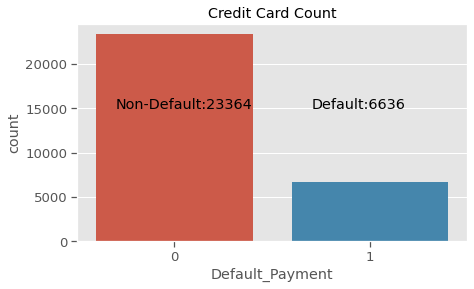

In [ ]:
# we will plot the target variable value counts using seaborn countplot
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default_Payment',data=df)
plt.annotate('Default:{}'.format(yes),xy=(0.7, 15000))
plt.annotate('Non-Default:{}'.format(no),xy=(-0.3, 15000))
plt.title('Credit Card Count')


We will plot a histogram for credit given to customers

**Histogram**

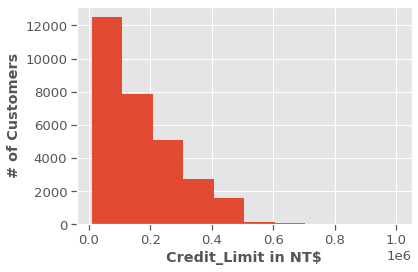

In [ ]:
# plotting a histogram for credit given to customers
plt.hist(df["LIMIT_BAL"])
plt.xlabel('Credit_Limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

**Boxplot**

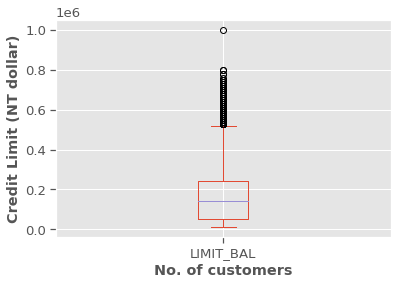

In [ ]:
# Boxplot for credit given to customer
df['LIMIT_BAL'].plot(kind='box')
plt.xlabel('No. of customers',fontweight='bold')
plt.ylabel('Credit Limit (NT dollar)',fontweight='bold')
plt.show()

We can see that the 50 percintile lies somewhat around 15000 - 17000 NT dollar.

Max limit is around 55000 NT dollar.

We can spot a wide outlier around 100000 - 120000 NT dollar.

### **Now we will define various functions which will draw various charts for given variable**

**stacked bar chart**

In [ ]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def stacked_bar_chart(column_name):
    ''' 
    it Will take column name and plot a stacked bar chart showing percentage of default and non-default payments  
    '''
    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['HAS_DEF'],columns = df[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(1,len(labels)+1)), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()
    

**Count Plot**

In [ ]:
def count_plot(col_name):
  '''
  This function takes in variable name and plot it against our Target Variable-"Default_Payment"
  '''
  sns.catplot(x=col_name, col='Default_Payment', data = df, kind= "count", height = 5, aspect=0.8)


**Box Plot**

In [ ]:
def box_plot(input_name):
  '''
  This function takes in variable of dataframe as input and returns its comparison with Limit_bal
  '''
  plt.figure(figsize=(8,6))
  sns.boxplot(x=input_name, y="LIMIT_BAL",
             palette=["m", "g"],
            data=df)
  sns.despine(offset=10, trim=True)

**we wrote a function now we will sit back and curiously looking into differnt variables....**

### **Education**

Here

**1 - Graduate School Education**

**2 - University Education**

**3 - High Scholl Education**

**4 - Other Education** 

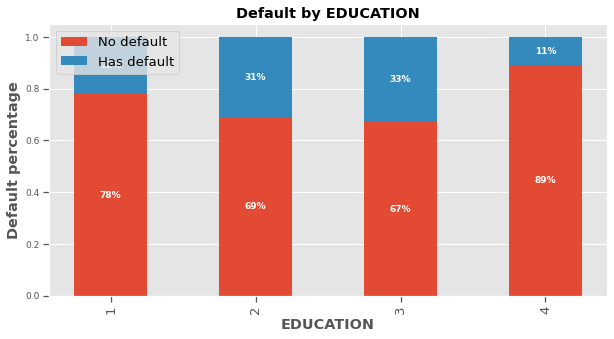

In [ ]:
# stacked bar chart for exploring percentage of default payment in each education caategory
stacked_bar_chart('EDUCATION')

Here we can draw a conclusion that people with only High school education has high default percentage followed by people with university educated people.

People with other education background having a very low default percentage, followed by people with Graduated background.

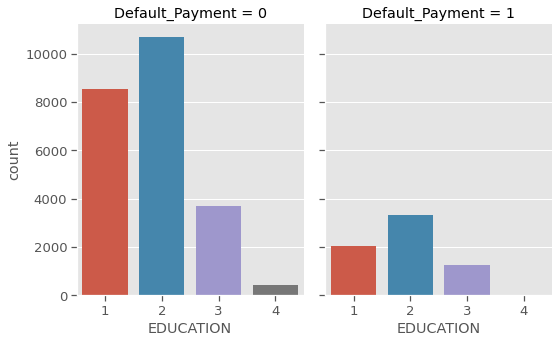

In [ ]:
# countplot education vs default payment
count_plot('EDUCATION')

**Here in above figure we can see that people with university education has more numbers in default payments, but on the other side we can see that these peoples also has more in numbers for regular payments.**

**Hence we can say that people with university education tend to get credit or credit card, followed by people with Graduate School education.**


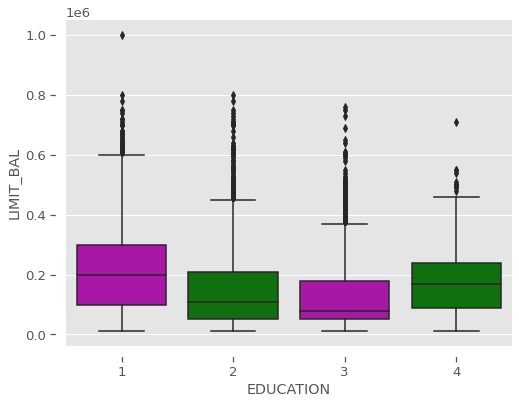

In [ ]:
# we will explore how much credit given in each eduction categories
box_plot('EDUCATION')

From above boxplot we can say that people with Graduate school education having high credit limit average of 20000 NT dollars.

And same time people with High school education have low credit limit average of 80000-10000 NT Dollars.

### **Gender**

Here

**1-Male**

**2-Female**

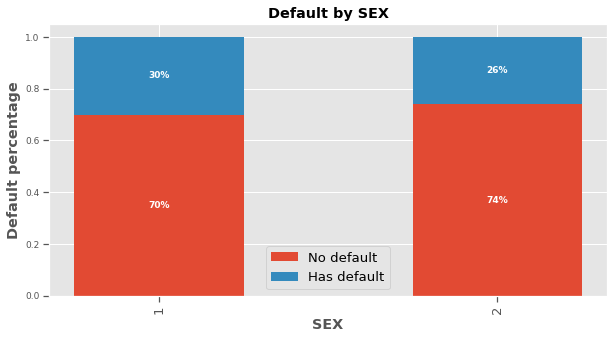

In [ ]:
# getting percentage of default and non default genderwise
stacked_bar_chart('SEX')

**From above chart we can clearly see that female have slightly less default percentage than male.**

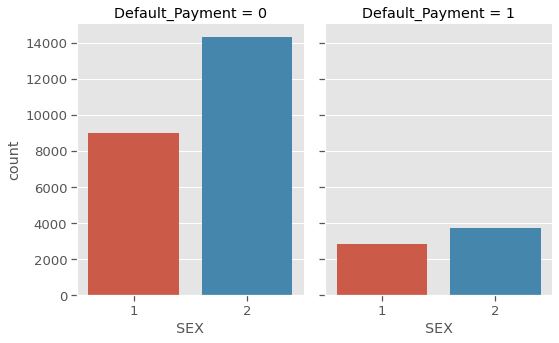

In [ ]:
# we will count default and non-default payment genderwise using our defined function for countplot
count_plot('SEX')

**Here we can see that on both side Non-Default(0) and Default(1) women has more in numbres, so we can conclude that credit given is more to women as compare to men.**

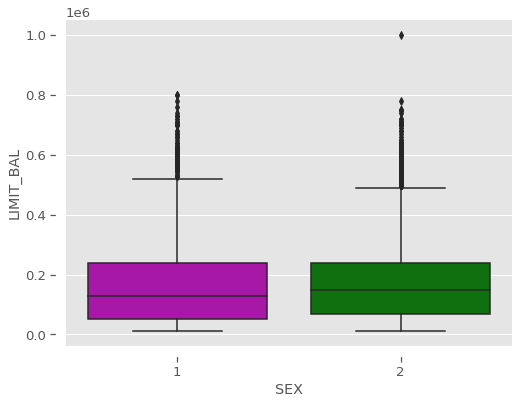

In [ ]:
# checking credit limit for male and female using boxplot
box_plot('SEX')

**By seeing above box plot we can say that women have a slight higher average credit limit balance than men.**

**Whereas max credit limit balance which is Q3 is slightly higher for men and maximum bar is also slightly higher for men.**

### **Marital Status**

Here

**1 : Married**

**2 : Single**

**3 : Other Marital Status**

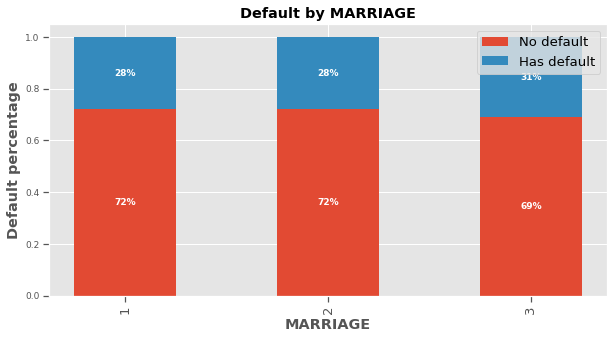

In [ ]:
# Using stacked bar chart function we will check marital status wise default percentage
stacked_bar_chart('MARRIAGE')

**Here people with other marital status having a slight more number of default percentage**.

**And for Married and Single people its the same.**

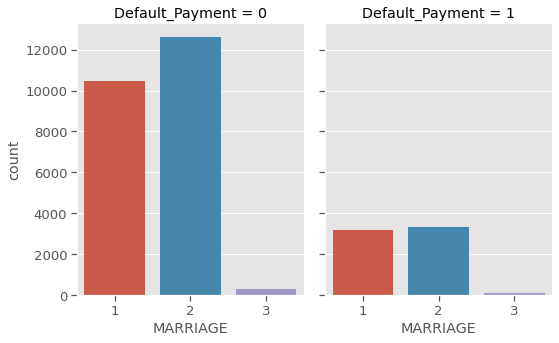

In [ ]:
# Counting default and non-default payment for every marital status
count_plot('MARRIAGE')

**In above graph we can draw the conclusion that persons who are single as marital status are more in number so they are the persons who has high chance to get credit.**

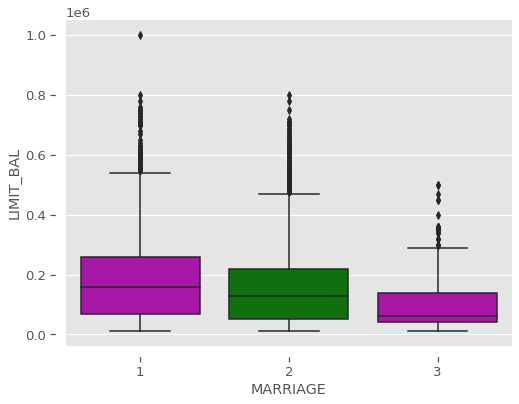

In [ ]:
# We will see given credit limit for every marital status we got
box_plot('MARRIAGE')

**We can see that Married people has a slightly higher average credit limit balance than single people, may be because of needs we can say.**

### **Age Group**

In [ ]:
# We will group the ages and create a new column of Age_Group
bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df['Age_Group'] = pd.cut(df['AGE'],bins=bins, labels=labels,right=False)

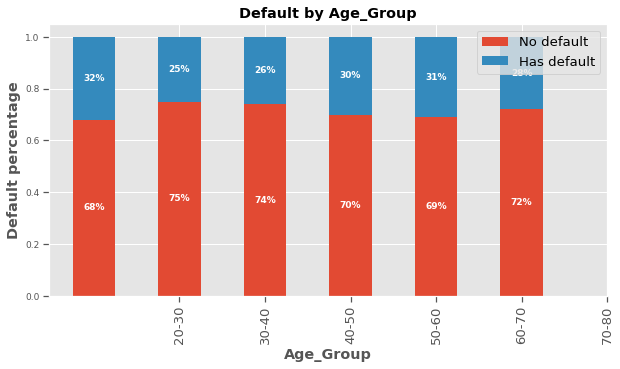

In [ ]:
# Stacked bar chart for different age groups showing default and non-default payment percentage
stacked_bar_chart('Age_Group')

**Here 20-30 years age group has higher payment deault percent, followed by 60-70 years and 50-60 years with 32%, 31% and 30% respectively.**

**And 30-40 years age group has low percent of payment default rate which is 25%.**

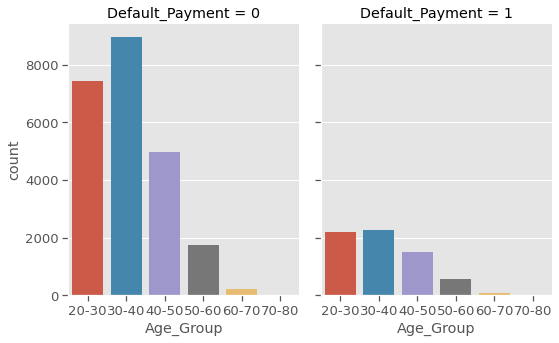

In [ ]:
count_plot('Age_Group')

**In above chart age group of 30-40 years having more in numbers, means this group has higher chance to get credit limit, followed by age group of 20-30 years.**

**whereas age group after 60 years are very less in numbers so they are less chance to get a credit limit balance.**

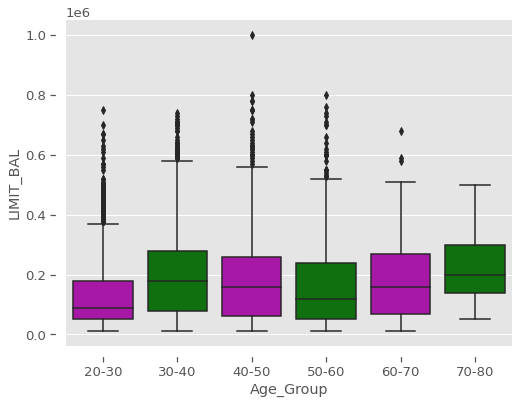

In [ ]:
box_plot("Age_Group")

**In above box plot surprising age group of 70-80 years has a higher average credit limit balance, may be because they are very low in number.**

**After that age group of 30-40 years having 2nd highest credit limit balance and also having 2nd maximum Q3.**

**And for age group of 20-30 years there is low average credit score, because we can say that most of them not earning or having less earning as comapre to age groups above 30 years.**



### **Bill Trend**

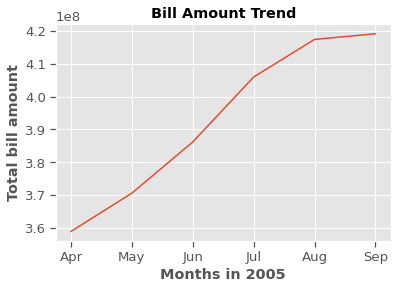

In [ ]:
# we will check billing amount trend for those people who has atleast one latepayment
bill_trend = df[df['HAS_DEF']== 1]
bill_amt_trend = bill_trend[['Apr_Bill_Amt','May_Bill_Amt','Jun_Bill_Amt','Jul_Bill_Amt','Aug_Bill_Amt','Sept_Bill_Amt']].sum(axis=0)

# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(bill_amt_trend)
plt.xticks(['Apr_Bill_Amt','May_Bill_Amt','Jun_Bill_Amt','Jul_Bill_Amt','Aug_Bill_Amt','Sept_Bill_Amt'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total bill amount',fontweight='bold')
plt.title('Bill Amount Trend',fontweight='bold')

plt.show()

**Above graph indicates that in last 6 months billing amount is increased continuously**

### **Repayment Status**

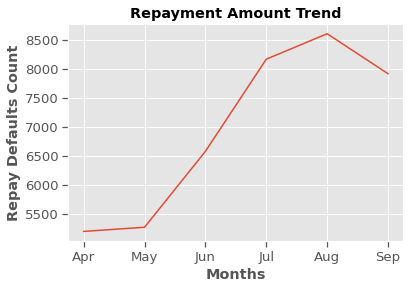

In [ ]:
# We will explore repayment status who had atleast one late payment after due date
repay_status = df[df['HAS_DEF']== 1]
repay_trend = bill_trend[['Apr_repay_status','May_repay_status','June_repay_status','Jul_repay_status','Aug_repay_status','Sept_repay_status']].sum(axis=0)

fig,ax = plt.subplots()
ax.plot(repay_trend)
plt.xticks(['Apr_repay_status','May_repay_status','June_repay_status','Jul_repay_status','Aug_repay_status','Sept_repay_status'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months',fontweight='bold')
plt.ylabel('Repay Defaults Count',fontweight='bold')
plt.title('Repayment Amount Trend', fontweight='bold')

plt.show()


**Here default payment(atleast 1) has increased till August 2005 and then decreased a slight in September 2005.**

### **Repayment Amount**

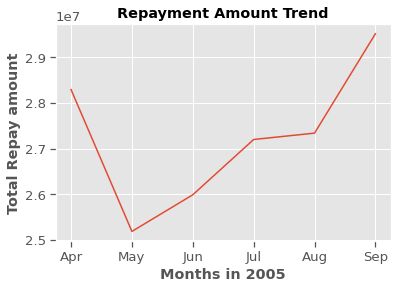

In [ ]:
# We will explore repayment payment amount trend in last 6 months in 2005
repayment_trend= df[df['HAS_DEF']==1]
repay_amt_trend = repayment_trend[['Apr_Pay_Amt','May_Pay_Amt','Jun_Pay_Amt','Jul_Pay_Amt','Aug_Pay_Amt','Sept_Pay_Amt']].sum(axis=0)


fig,ax = plt.subplots()
ax.plot(repay_amt_trend)
plt.xticks(['Apr_Pay_Amt','May_Pay_Amt','Jun_Pay_Amt','Jul_Pay_Amt','Aug_Pay_Amt','Sept_Pay_Amt'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total Repay amount',fontweight='bold')
plt.title('Repayment Amount Trend',fontweight='bold')

plt.show()

**In above graph Repayment amount decreased from April to May, but then May to September, which is good sign**

### **Box Plot- Credit limit & Dfault**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


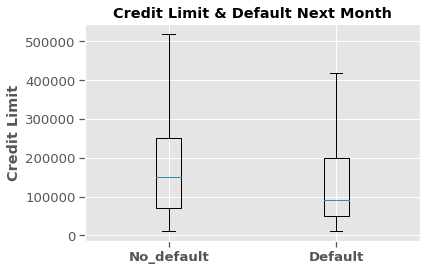

In [ ]:
# we will try to fetch relation between credit limit and default payment
def_n = df.loc[df['Default_Payment'] == 0,'LIMIT_BAL']
def_y= df.loc[df['Default_Payment'] == 1,'LIMIT_BAL']

fig, ax = plt.subplots()
ax.boxplot([def_n, def_y],  showfliers=False)  #Using matplotlib boxplot

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit Limit',fontweight ='bold')
ax.set_title('Credit Limit & Default Next Month',fontweight ='bold')

plt.show()

**Here we clearly see that people having low credit limit tend to default the payment, because average credit limit is low for default payments than non-default payments.**

**People with higher average credit limit are tend to reapay the amount regulary.**

In [ ]:
# we will check once data type
df.dtypes

0
LIMIT_BAL               int64
SEX                     int64
EDUCATION               int64
MARRIAGE                int64
AGE                     int64
Sept_repay_status       int64
Aug_repay_status        int64
Jul_repay_status        int64
June_repay_status       int64
May_repay_status        int64
Apr_repay_status        int64
Sept_Bill_Amt           int64
Aug_Bill_Amt            int64
Jul_Bill_Amt            int64
Jun_Bill_Amt            int64
May_Bill_Amt            int64
Apr_Bill_Amt            int64
Sept_Pay_Amt            int64
Aug_Pay_Amt             int64
Jul_Pay_Amt             int64
Jun_Pay_Amt             int64
May_Pay_Amt             int64
Apr_Pay_Amt             int64
Default_Payment         int64
HAS_DEF               float64
Age_Group            category
dtype: object

**Making a copy of our original dataset for further processing**

In [ ]:
# Making copy of df
df_1 = df.copy()

### **Encoding**

**we will get the dummies for education column**

In [ ]:
# we are uaing get_dummies
edu_dummies = pd.get_dummies(df_1.EDUCATION)
df_1 = pd.concat([df_1, edu_dummies], axis='columns')
df_1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_repay_status,Aug_repay_status,Jul_repay_status,June_repay_status,May_repay_status,...,Jun_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,Default_Payment,HAS_DEF,Age_Group,1,2,3,4
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,1,1.0,20-30,0,1,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,1000,0,2000,1,1.0,20-30,0,1,0,0
3,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,5000,0,0.0,30-40,0,1,0,0
4,50000,2,2,1,37,0,0,0,0,0,...,1100,1069,1000,0,0.0,30-40,0,1,0,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,9000,689,679,0,0.0,50-60,0,1,0,0


In [ ]:
# renaming the columns for sake of simplicity
df_1.rename(columns={1:'graduate_school_edu',2:'university_edu',3:'highschool_edu',4:'other_edu'},inplace=True)

In [ ]:
# Checking that all above operation done correctly or not
df_1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_repay_status,Aug_repay_status,Jul_repay_status,June_repay_status,May_repay_status,...,Jun_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,Default_Payment,HAS_DEF,Age_Group,graduate_school_edu,university_edu,highschool_edu,other_edu
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,1,1.0,20-30,0,1,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,1000,0,2000,1,1.0,20-30,0,1,0,0
3,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,5000,0,0.0,30-40,0,1,0,0
4,50000,2,2,1,37,0,0,0,0,0,...,1100,1069,1000,0,0.0,30-40,0,1,0,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,9000,689,679,0,0.0,50-60,0,1,0,0


seems perfect, now lets move forwars...

### **Gender**

In [ ]:
# We are getting dummy for gender column
gender_dummies = pd.get_dummies(df_1.SEX)
df_1 = pd.concat([df_1, gender_dummies], axis='columns')

In [ ]:
# renaming for avoiding confusion
df_1.rename(columns={1:'Male',2:'Female'},inplace=True)

### **Marrital Status**

In [ ]:
# Getting dummies for marriage column
marriage_dummies= pd.get_dummies(df_1.MARRIAGE)
df_1= pd.concat([df_1, marriage_dummies], axis = 'columns')

In [ ]:
# Renaming columns for simplicity
df_1.rename(columns={1:'Married',2:'Single',3:'Other_marital_status'},inplace=True)

### **Age Group**

Generations according to age group-

**0-14 years = Childrens**

**15-25 years = Youth**

**26-41 years = Young Adutls**

**42-60 years = Adults**

**Above 61 years= Old Adults** 


In [ ]:
# Fetching unique age values
df_1.AGE.unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

We have age range from 24 to 74 years

we will make a new column named Age_Group which include distribution age groupwise

In [ ]:
# We are creating a new column called 'Age_Group'
bins= [20,40,60,80]
labels = ['21-40','41-60','61-79']
df_1['Age_Group'] = pd.cut(df_1['AGE'],bins=bins, labels=labels,right=False)

In [ ]:
# Now we will get dummies for "Age_Group"
age_dummies= pd.get_dummies(df_1.Age_Group)
df_1= pd.concat([df_1, age_dummies], axis = 'columns')

In [ ]:
# Renaming that columns according to age group
df_1.rename(columns={'21-40':'youth','41-60':'young_adults','61-79':'old_adults'},inplace=True)

In [ ]:
# Checking again...everything is fine or not???
df_1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_repay_status,Aug_repay_status,Jul_repay_status,June_repay_status,May_repay_status,...,highschool_edu,other_edu,Male,Female,Married,Single,Other_marital_status,youth,young_adults,old_adults
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,1,1,0,0,1,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,90000,2,2,2,34,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,50000,2,2,1,37,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,0,0,1,0,1,0,0,0,1,0


All good till here, lets move....

Now we will drop all the columns that ecncoded above

In [ ]:
# dropping the alreadu encoded columns
df_1.drop(['SEX','EDUCATION','MARRIAGE','AGE','Age_Group'],axis=1,inplace=True)

In [ ]:
# checking
df_1.head()

,LIMIT_BAL,Sept_repay_status,Aug_repay_status,Jul_repay_status,June_repay_status,May_repay_status,Apr_repay_status,Sept_Bill_Amt,Aug_Bill_Amt,Jul_Bill_Amt,...,highschool_edu,other_edu,Male,Female,Married,Single,Other_marital_status,youth,young_adults,old_adults
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,0,0,0,1,1,0,0,1,0,0
2,120000,-1,2,0,0,0,2,2682,1725,2682,...,0,0,0,1,0,1,0,1,0,0
3,90000,0,0,0,0,0,0,29239,14027,13559,...,0,0,0,1,0,1,0,1,0,0
4,50000,0,0,0,0,0,0,46990,48233,49291,...,0,0,0,1,1,0,0,1,0,0
5,50000,-1,0,-1,0,0,0,8617,5670,35835,...,0,0,1,0,1,0,0,0,1,0


### **Correlation**

In [ ]:
# Checking correlation 
round(df_1.corr(),2)  #rounding off the numbers upto 2 decimal

,LIMIT_BAL,Sept_repay_status,Aug_repay_status,Jul_repay_status,June_repay_status,May_repay_status,Apr_repay_status,Sept_Bill_Amt,Aug_Bill_Amt,Jul_Bill_Amt,...,highschool_edu,other_edu,Male,Female,Married,Single,Other_marital_status,youth,young_adults,old_adults
LIMIT_BAL,1.00,-0.27,-0.30,-0.29,-0.27,-0.25,-0.24,0.29,0.28,0.28,...,-0.14,0.01,-0.02,0.02,0.10,-0.09,-0.06,-0.05,0.04,0.02
Sept_repay_status,-0.27,1.00,0.67,0.57,0.54,0.51,0.47,0.19,0.19,0.18,...,0.06,-0.02,0.06,-0.06,-0.02,0.01,0.01,0.01,-0.02,0.01
Aug_repay_status,-0.30,0.67,1.00,0.77,0.66,0.62,0.58,0.23,0.24,0.22,...,0.06,-0.03,0.07,-0.07,-0.02,0.02,0.01,0.02,-0.02,0.00
Jul_repay_status,-0.29,0.57,0.77,1.00,0.78,0.69,0.63,0.21,0.24,0.23,...,0.06,-0.03,0.07,-0.07,-0.03,0.03,0.01,0.02,-0.02,-0.00
June_repay_status,-0.27,0.54,0.66,0.78,1.00,0.82,0.72,0.20,0.23,0.24,...,0.06,-0.03,0.06,-0.06,-0.03,0.03,0.01,0.02,-0.02,-0.00
May_repay_status,-0.25,0.51,0.62,0.69,0.82,1.00,0.82,0.21,0.23,0.24,...,0.05,-0.03,0.06,-0.06,-0.03,0.03,0.01,0.02,-0.02,-0.00
Apr_repay_status,-0.24,0.47,0.58,0.63,0.72,0.82,1.00,0.21,0.23,0.24,...,0.04,-0.04,0.04,-0.04,-0.03,0.03,0.01,0.02,-0.02,0.00
Sept_Bill_Amt,0.29,0.19,0.23,0.21,0.20,0.21,0.21,1.00,0.95,0.89,...,-0.02,0.04,0.03,-0.03,0.03,-0.02,-0.02,-0.03,0.02,0.02
Aug_Bill_Amt,0.28,0.19,0.24,0.24,0.23,0.23,0.23,0.95,1.00,0.93,...,-0.02,0.03,0.03,-0.03,0.02,-0.02,-0.02,-0.03,0.02,0.02
Jul_Bill_Amt,0.28,0.18,0.22,0.23,0.24,0.24,0.24,0.89,0.93,1.00,...,-0.02,0.03,0.02,-0.02,0.03,-0.02,-0.02,-0.02,0.02,0.02


### **Correlation Matrix**

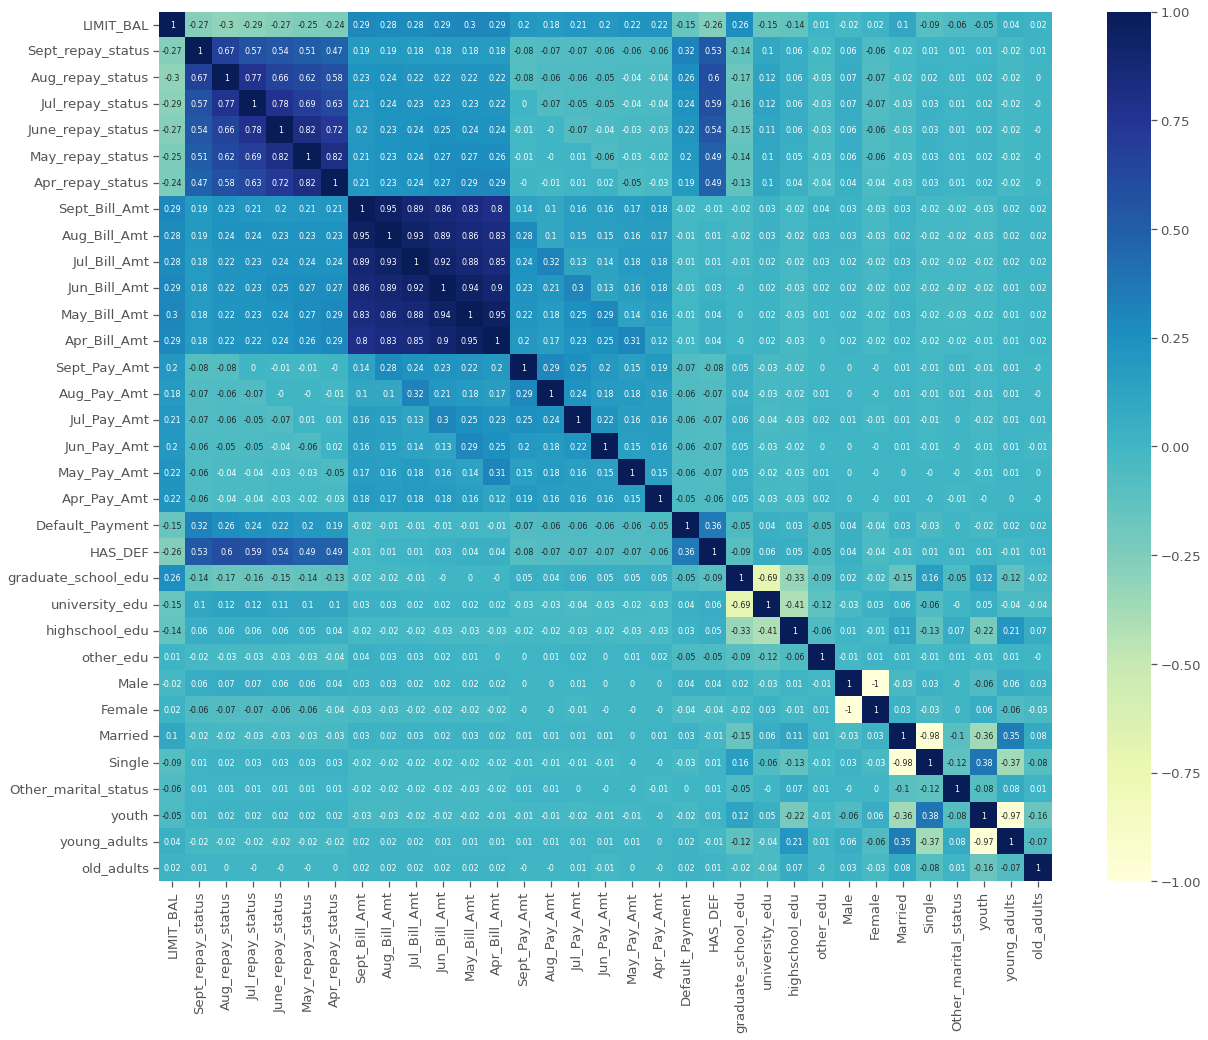

In [ ]:
# plotting correlation heatmap using seaborn
plt.figure(figsize=(20,16))
corr = round(df_1.corr(),2)

sns.heatmap(corr, annot= True, cmap = 'YlGnBu',annot_kws={'size':8})

**From above correlation heatmap we clearly see that Payment Defaulted or not is more correlated with repayment status in last 6 months than other features.**

**Also Education,Marriage status and Age group have positively correlated.**

**so we will dig deeper into that.**

In [ ]:
# Getting column names
df_1.columns

Index(['LIMIT_BAL', 'Sept_repay_status', 'Aug_repay_status',
       'Jul_repay_status', 'June_repay_status', 'May_repay_status',
       'Apr_repay_status', 'Sept_Bill_Amt', 'Aug_Bill_Amt', 'Jul_Bill_Amt',
       'Jun_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt', 'Sept_Pay_Amt',
       'Aug_Pay_Amt', 'Jul_Pay_Amt', 'Jun_Pay_Amt', 'May_Pay_Amt',
       'Apr_Pay_Amt', 'Default_Payment', 'HAS_DEF', 'graduate_school_edu',
       'university_edu', 'highschool_edu', 'other_edu', 'Male', 'Female',
       'Married', 'Single', 'Other_marital_status', 'youth', 'young_adults',
       'old_adults'],
      dtype='object')

**Now we will plot correlation of these features which are more correlated with our target variable**

In [ ]:
# Defining features for better correlation
features_corr = df_1[['LIMIT_BAL', 'Sept_repay_status', 'Aug_repay_status',
       'Jul_repay_status', 'June_repay_status', 'May_repay_status',
       'Apr_repay_status','graduate_school_edu',
       'university_edu', 'highschool_edu', 'other_edu', 'Male', 'Female',
       'Married', 'Single', 'Other_marital_status', 'youth', 'young_adults',
       'old_adults','Default_Payment']]

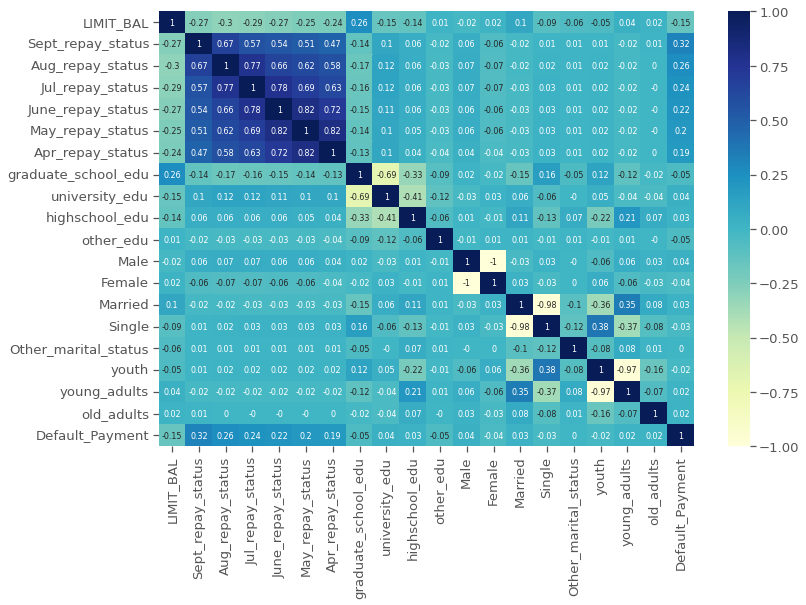

In [ ]:
# Again plotting correlation heatmap using seaborn
plt.figure(figsize=(12,8))
corr_1= round(features_corr.corr(),2)
sns.heatmap(corr_1,annot=True,cmap='YlGnBu',annot_kws={'size':8})

From above correlation heatmap it is clearly seen that Repayment status from last 6 months can be used for predicting wheather customer will pay in time or make default.

In [ ]:
# Getting column names
df_1.columns

Index(['LIMIT_BAL', 'Sept_repay_status', 'Aug_repay_status',
       'Jul_repay_status', 'June_repay_status', 'May_repay_status',
       'Apr_repay_status', 'Sept_Bill_Amt', 'Aug_Bill_Amt', 'Jul_Bill_Amt',
       'Jun_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt', 'Sept_Pay_Amt',
       'Aug_Pay_Amt', 'Jul_Pay_Amt', 'Jun_Pay_Amt', 'May_Pay_Amt',
       'Apr_Pay_Amt', 'Default_Payment', 'HAS_DEF', 'graduate_school_edu',
       'university_edu', 'highschool_edu', 'other_edu', 'Male', 'Female',
       'Married', 'Single', 'Other_marital_status', 'youth', 'young_adults',
       'old_adults'],
      dtype='object')

## **Model Training**

**Data Splitting into features and target variable**

In [ ]:
x = df_1.drop(columns=['Default_Payment','HAS_DEF']) #defining x
y = df_1['Default_Payment'] #defining y

In [ ]:
# converting x columns to list
feature_col = x.columns.tolist()

In [ ]:
# Getting numerical columns
x_num = x.drop(columns=['graduate_school_edu',
       'university_edu', 'highschool_edu', 'other_edu', 'Male', 'Female',
       'Married', 'Single', 'Other_marital_status', 'youth', 'young_adults',
       'old_adults'])
num_col = x_num.columns.tolist()

**Checking for class imbalance**

0    0.7788
1    0.2212
Name: Default_Payment, dtype: float64


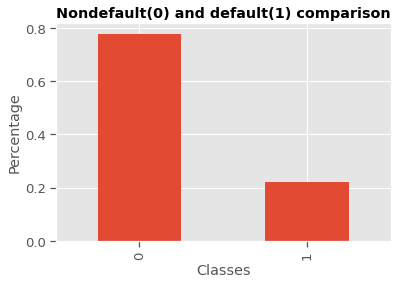

In [ ]:
# Checking for class imbalance and plotting
class_imbalance = df_1['Default_Payment'].value_counts(normalize=True)
print(class_imbalance)
class_imbalance.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

**We can clearly see that the dataset is imbalanced, so we will use SMOTE (Synthetic Minority Oversampling Technique)**
:-SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

### **Splitting Data**

**We will defining various function as per our need:-**

**We will defing a function to split the data with and withour SMOTE**

**Train Test Split**

In [ ]:
# Defining A function to split data with and without SMOTE

def split_data(x,y, imbalance = False):

    '''
    It will take dataset and check weather it is imabalanced or not and apply SMOTE accordingly
    '''
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, shuffle=True, stratify=y, random_state=36)

    if imbalance:
      # We will use SMOTE to over sample the data

      from imblearn.over_sampling import SMOTE
      smote = SMOTE(random_state= 36)
      x_train,y_train = smote.fit_resample(x_train, y_train.ravel())

    return x_train, x_test, y_train, y_test


### **Standardizing and scaling**

In [ ]:
# Defining a function to rescale training data using Standars Scaler

def std_scaling (x_train, x_test, numerical_columns ):

    # we will make copies of dataset
    x_train_std = x_train.copy()
    x_test_std = x_test.copy()

    # Applying Standardization on numerical columns only
    for i in numerical_columns:
      scl = StandardScaler().fit(x_train_std[[i]])
      x_train_std[i] = scl.transform(x_train_std[[i]])
      x_test_std[i] = scl.transform(x_test_std[[i]])

    return x_train_std, x_test_std


### **Models**

## **LOGISTIC REGRESSION**

In [ ]:
def apply_logistic_regression(imbalance=False):
  '''
  This model uses above defined functions and apply logistic regression model
  '''

  # splitting data
  x_train,x_test,y_train,y_test = split_data(x,y, imbalance = imbalance)

  # Rescaling data
  x_train_std, x_test_std = std_scaling(x_train, x_test, numerical_columns = num_col )

  clf = LogisticRegression(random_state=36)

  # fir the model
  clf.fit(x_train_std, y_train)

  # Using model's default parameters to get cross validation score

  score = cross_val_score (clf, x_train_std, y_train, scoring = "roc_auc",cv=5)
  roc_auc_lr = np.mean(score)


  if imbalance:
    return "Logistic Regression", "With SMOTE", roc_auc_lr
  else:
    return "Logistic Regression", "Without SMOTE", roc_auc_lr

model_result=[]
model_result.append(apply_logistic_regression())
model_result.append(apply_logistic_regression(imbalance=True))

pd.DataFrame(model_result, columns=["Model", "SMOTE", "ROC_AUC Score"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Model,SMOTE,ROC_AUC Score
0,Logistic Regression,Without SMOTE,0.720545
1,Logistic Regression,With SMOTE,0.905483


**Here ROC_AUC score on training data is much better using SMOTE, so we will SOMTE for tuning the model**

**Parameter tuning for Logistic Regression**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# splitting data with SMOTE
x_train, x_test, y_train, y_test = split_data(x,y, imbalance = True)
# Rescale data
x_train_std, x_test_std = std_scaling(x_train, x_test, numerical_columns= num_col)

logistic= LogisticRegression(solver='saga',tol= 1e-2, max_iter=200, random_state=36)
distributions = dict(C=uniform(loc=0,scale=4),penalty=['l2','l1'])
clfc = RandomizedSearchCV(logistic, distributions, random_state=36)

lr_best = clfc.fit(x_train_std, y_train)

print(lr_best.best_params_)

{'C': 1.645579535656045, 'penalty': 'l2'}


In [ ]:
# Save tuned model and parameters
import joblib
from joblib import dump,load
joblib.dump(lr_best,'logreg_sm_tuned_.pkl')

In [ ]:
lr_best = joblib.load("logreg_sm_tuned_.pkl")

**ROC_AUC score after tuning**

In [ ]:
# Get ROC_AUC score of tuned model on training data

tuned_scores = cross_val_score(lr_best, x_train_std, y_train, scoring="roc_auc", cv=5)
roc_auc_lr_best = np.mean(tuned_scores)

print(f'ROC_AUC score after parameter tuning:{roc_auc_lr_best:.3f}')

ROC_AUC score after parameter tuning:0.898


In [ ]:
joblib.dump(roc_auc_lr_best,"logreg_ROC_AUC_CV.pkl") 

['logreg_ROC_AUC_CV.pkl']

In [ ]:
roc_auc_lr_best = joblib.load("logreg_ROC_AUC_CV.pkl")
roc_auc_lr_best

0.8976955252366269

After fine-tuning parameter C, Logistic Regression model got ROC_AUC training score as 0.897, slightly decreased from original score 0.898. This could mean model is less overfitting the training data.

**Performance Matrix**

In [ ]:
# Defining a function to print performance matrix

def model_performance(model,x_test,y_test):
    y_pred = model.predict(x_test)
    tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2* (precision * recall) / (precision + recall)

    print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')

In [ ]:
print("Logistic Regression Model on Test Data :")
model_performance(lr_best, x_test_std, y_test)

Logistic Regression Model on Test Data :
Precision:0.639
Recall:0.386
F1 score:0.482


**Model Performance:**

**In this case of credit card default prediction, requires model with a high recall, but here in Logistic regression model recall is 0.386. So we will try another model called Random Forest.**




# **Random Forest**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

**Defining a function for Random Forest model**

Rescaling is not required in tree based models so here we dont want to rescale our data

In [ ]:
def run_random_forest(imbalance=False):
    # Split data  
    x_train, x_test, y_train, y_test = split_data(x, y, imbalance = imbalance)
    
    # Instantiate model
    clf_rf = RandomForestClassifier()
   
    # Fit the model
    clf_rf.fit(x_train, y_train)

    # Use model's default parameters to get cross validation score
    scores = cross_val_score(clf_rf, x_train, y_train, scoring ="roc_auc", cv = 5)
    roc_auc_rf = np.mean(scores)
    
    if imbalance:
        return "Random Forest", "With SMOTE", roc_auc_rf
    else:
        return "Random Forest", "Without SMOTE", roc_auc_rf

model_result = []
model_result.append(run_random_forest())
model_result.append(run_random_forest(imbalance=True))

pd.DataFrame(model_result, columns = ["Model", "SMOTE", "ROC_AUC Score"])

,Model,SMOTE,ROC_AUC Score
0,Random Forest,Without SMOTE,0.756225
1,Random Forest,With SMOTE,0.937583


**Here also ROC_AUC score on training data is good with SMOTE, so we will use SMOTE**

 **Train Test Split**

In [ ]:
# Split data with SMOTE
x_train_sm, x_test, y_train_sm, y_test = split_data(x, y, imbalance = True)

**Hyperparameter Tuning**

In [ ]:
# Create parameter grid  
param_grid = {
    'max_depth': [60, 90, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Instantiate the model
clf_rf = RandomForestClassifier()

# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid,    
                          cv = 3, n_jobs = -1, verbose = 1)

# Fit grid search to the data
grid_search.fit(x_train_sm, y_train_sm)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 110,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

**Saving the model**

In [ ]:
joblib.dump(grid_search,"RandomForest_tuned_final.pkl")

['RandomForest_tuned_final.pkl']

In [ ]:
grid_search = joblib.load("RandomForest_tuned_final.pkl")

**Use the best parameters to fit the model**

In [ ]:
# Use the best parameters to fit the model
rf_best = RandomForestClassifier(**grid_search.best_params_)   
rf_best.fit(x_train_sm,y_train_sm)

scores_best = cross_val_score(rf_best, x_train_sm, y_train_sm, scoring ="roc_auc", cv = 5)
roc_auc_best = np.mean(scores_best)

print(f'ROC_AUC training score after tuning for Random Forest: {roc_auc_best:.3f}')

ROC_AUC training score after tuning for Random Forest: 0.936


After tuning parameters, Random Forest model's ROC-AUC score decreased slightly to 0.936.

**Evaluation Metrics**

In [ ]:
print('Random Forest model on test data:')
model_performance(rf_best, x_test, y_test)

Random Forest model on test data:
Precision:0.615
Recall:0.479
F1 score:0.539


Now we will try XGBoost

# **XGBoost**

Defining a function hat deines XGBoost model

In [ ]:
def run_xgboost(imbalance=False):
    # Split data  
    x_train, x_test, y_train, y_test = split_data(x, y, imbalance = imbalance)
    
    # Instantiate model with default parameters
    clf_xgb = XGBClassifier()
    
    # Fit the model
    clf_xgb.fit(x_train, y_train)

    # Use model's default parameters to get cross validation score
    scores = cross_val_score(clf_xgb, x_train, y_train, scoring ="roc_auc", cv = 5)
    roc_auc_xgb = np.mean(scores)
    
    if imbalance:
        return "XGBoost", "With SMOTE", roc_auc_xgb
    else:
        return "XGBoost", "Without SMOTE", roc_auc_xgb

    
model_result = []
model_result.append(run_xgboost())                  
model_result.append(run_xgboost(imbalance=True))    

pd.DataFrame(model_result, columns = ["Model", "SMOTE", "ROC_AUC Score"])

,Model,SMOTE,ROC_AUC Score
0,XGBoost,Without SMOTE,0.777783
1,XGBoost,With SMOTE,0.920871


Here SMOTE sampling performed better on training data, we will use SMOTE sampling and initial best guess parameters to fit the model.


**Splitting the Data**

In [ ]:
# Sampling and split data with SMOTE
x_train_sm, x_test, y_train_sm, y_test = split_data(x, y, imbalance = True)

In [ ]:
# Instantiate models with initial best guess parameters

params = { 
    'gamma':0,
    'learning_rate':0.01, 
    'max_depth':3, 
    'colsample_bytree':0.6,
    'subsample':0.8,
    'scale_pos_weight':3.5,
    'n_estimators':1000,
    'objective':'binary:logistic', 
    'reg_alpha':0.3    
}
    
# Instantiate model
clf_xgb = XGBClassifier(**params)

# Use model's initial parameters to get cross validation score
scores = cross_val_score(clf_xgb, x_train_sm, y_train_sm, scoring ="roc_auc", cv = 5)
roc_auc_xgb = np.mean(scores)

print(f'ROC_AUC training score with initial best parameters for XGBoost: {roc_auc_xgb:.3f}')

ROC_AUC training score with initial best parameters for XGBoost: 0.918


**ROC_AUC training score with initial best parameters for XGBoost: 0.918**



### Tuning Parameters of XGBoost

In [ ]:
# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.6,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }
print(random_grid_xgb)

{'n_estimators': array([200, 400, 600, 800]), 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'max_depth': [3, 4, 5, 6, 7], 'subsample': array([0.5, 0.6, 0.7, 0.8]), 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]), 'scale_pos_weight': [1, 3.5]}


**Finding best parameters**

In [ ]:
# Use randomized search to find best parameters

xgboost = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = xgboost, 
                                param_distributions = random_grid_xgb, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1,
                                scoring ='roc_auc')


xgb_random.fit(x_train_sm, y_train_sm)   
xgb_random.best_params_, xgb_random.best_score_

print(xgb_random.best_params_,xgb_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


saving the model

In [ ]:
joblib.dump(xgb_random,'xgb_random_final.pkl')

['xgb_random_final.pkl']

Evaluation Metrtics

In [ ]:
# Compute precision, recall and F1 score of tuned XGBoost model on test data

print('XGBoost model on test data:')

model_performance(xgb_random, x_test, y_test)

XGBoost model on test data:
Precision:0.444
Recall:0.627
F1 score:0.520


### **Plotting confusion matrics for all 3 models**

In [ ]:
from sklearn.metrics import plot_confusion_matrix

Text(0.5, 1.0, 'XGBoost')

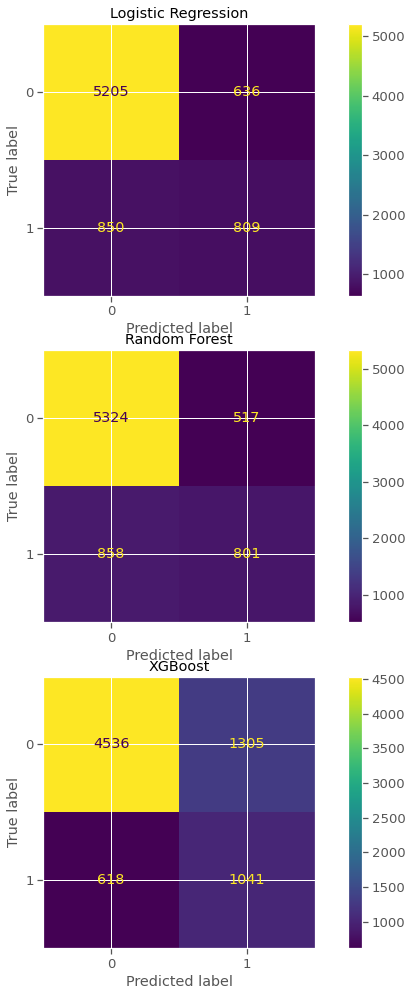

In [ ]:
# Plot confusion matrix of 3 models
fig,ax=plt.subplots(3,1, figsize=(12,17))

plot_confusion_matrix(lr_best, x_test_std, y_test, ax = ax[0], values_format="d")
ax[0].set_title("Logistic Regression")

plot_confusion_matrix(rf_best, x_test, y_test, ax = ax[1], values_format="d")
ax[1].set_title("Random Forest")

plot_confusion_matrix(xgb_random, x_test, y_test, ax = ax[2], values_format="d")
ax[2].set_title("XGBoost")

### **ROC_AUC curve**

In [ ]:
from sklearn.metrics import plot_roc_curve

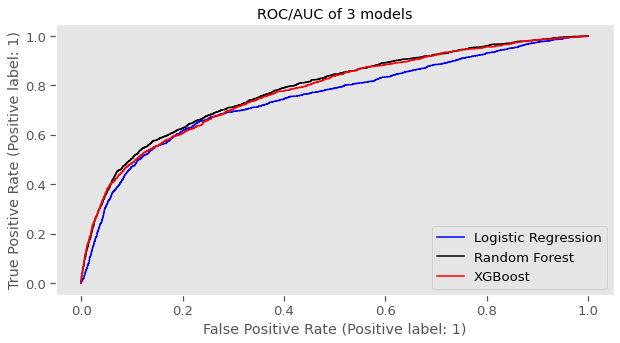

In [ ]:
# Plot ROC_AUC curve of 3 models
 
fig,ax=plt.subplots(figsize=(10,5))

plot_roc_curve(lr_best, x_test_std, y_test,ax=ax, color="blue",label='Logistic Regression')
plot_roc_curve(rf_best, x_test, y_test,ax=ax, color="black",label='Random Forest')
plot_roc_curve(xgb_random, x_test, y_test,ax=ax, color="red",label='XGBoost')

plt.title('ROC/AUC of 3 models')
plt.grid()

### **Precision Recall curve**

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

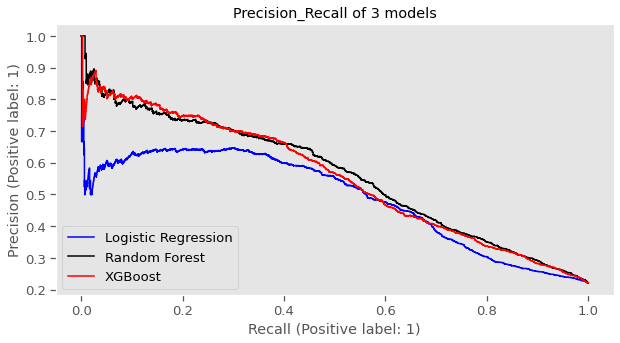

In [ ]:
# Compare 3 models' Precision_recall curves

fig,ax=plt.subplots(figsize=(10,5))

plot_precision_recall_curve(lr_best, x_test_std, y_test, ax=ax,color="blue",label='Logistic Regression')
plot_precision_recall_curve(rf_best, x_test, y_test, ax=ax,color="black",label='Random Forest')
plot_precision_recall_curve(xgb_random, x_test, y_test, ax=ax,color="red",label='XGBoost')

plt.title('Precision_Recall of 3 models')
plt.grid()



Comparing with dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_train, y_train)
DummyClassifier(strategy='stratified')
y_pred_dummy = dummy_clf.predict(x_test)

print('Dummy model:')
model_performance(dummy_clf, x_test, y_test)

Dummy model:
Precision:0.223
Recall:0.509
F1 score:0.310


In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
# Compute precision, recall and threshold of Random Forest

y_predict_rf = rf_best.predict_proba(x_test)
y_scores_rf = y_predict_rf[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_rf)

recalls_80 = recalls[np.argmin(recalls >= 0.80)]               # Recommend recall score = 0.8
precision_80 = precisions[np.argmin(recalls >= 0.80)]
threshold_80_recall = thresholds[np.argmin(recalls >= 0.80)]

thresholds = np.append(thresholds, 1)

recalls_80, precision_80, threshold_80_recall

(0.7998794454490658, 0.350131926121372, 0.2126978060216655)

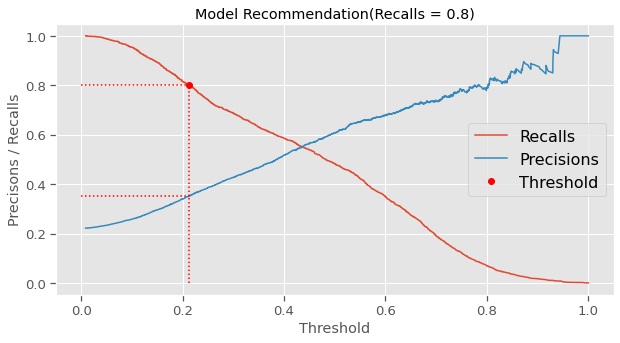

In [ ]:


# Plot recommended recall = 0.8

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(thresholds, recalls, label='Recalls')
ax.plot(thresholds, precisions, label='Precisions')

ax.plot([threshold_80_recall, threshold_80_recall], [precision_80, recalls_80], "r:" )
ax.plot([threshold_80_recall, threshold_80_recall], [0, precision_80], "r:")
ax.plot([0, threshold_80_recall], [precision_80, precision_80], "r:")
ax.plot([0, threshold_80_recall], [recalls_80, recalls_80], "r:")
ax.plot([threshold_80_recall], [recalls_80], "ro", label='Threshold')

ax.set_xlabel('Threshold')
ax.set_ylabel('Precisons / Recalls')
ax.legend(loc='center right',fontsize=16)
plt.title('Model Recommendation(Recalls = 0.8)')
plt.savefig('recommended_recall')
plt.show()



Text(0.5, 1.0, 'Features importance')

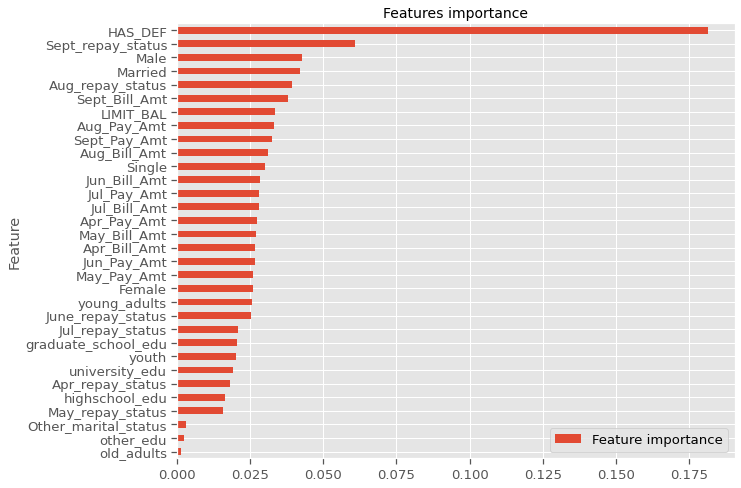

In [ ]:
# Plot feature importance of winner model - Random Forest

fea_df = pd.DataFrame({'Feature': feature_col, 'Feature importance': rf_best.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)